In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import time

from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

import re
import nltk.corpus
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
# Clean dataset
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
url = 'https://raw.githubusercontent.com/dashascience/-MBTI-Myers-Briggs-Personality-Type-Dataset/master/mbti_1.csv'
df = pd.read_csv(url)

In [ ]:
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [ ]:
# checking the types of varibles in the dataset(int,float,object) and also looking at null values
dtypes=pd.DataFrame(df.dtypes,columns=["Data Type"])
dtypes["Unique Values"]=df.nunique()
dtypes["Null Values"]=df.isnull().sum()
dtypes["% null Values"]=df.isnull().sum()/len(df)
dtypes.style.background_gradient(cmap='Set2',axis=0)

,Data Type,Unique Values,Null Values,% null Values
type,object,16,0,0.000000
posts,object,8675,0,0.000000


In [ ]:
# normalize, remove stop words and url links.
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
clean_text1=[]
for i in df.posts[0].split('|||'):
  i=i.lower()
  i = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", i)
  i_tokens = word_tokenize(i)
  filtered_i = [w for w in i_tokens if not w in stop_words]
  clean_text1.append(filtered_i)
  print(filtered_i)


[]
[]
['enfp', 'intj', 'moments', 'sportscenter', 'top', 'ten', 'plays', 'pranks']
['lifechanging', 'experience', 'life']
['repeat', 'today']
['may', 'perc', 'experience', 'immerse']
['last', 'thing', 'infj', 'friend', 'posted', 'facebook', 'committing', 'suicide', 'next', 'day', 'rest', 'peace']
['hello', 'enfj7', 'sorry', 'hear', 'distress', 'natural', 'relationship', 'perfection', 'time', 'every', 'moment', 'existence', 'try', 'figure', 'hard', 'times', 'times', 'growth']
['84389', '84390']
['welcome', 'stuff']
['game', 'set', 'match']
['prozac', 'wellbrutin', 'least', 'thirty', 'minutes', 'moving', 'legs', 'dont', 'mean', 'moving', 'sitting', 'desk', 'chair', 'weed', 'moderation', 'maybe', 'try', 'edibles', 'healthier', 'alternative']
['basically', 'come', 'three', 'items', 'youve', 'determined', 'type', 'whichever', 'types', 'want', 'would', 'likely', 'use', 'given', 'types', 'cognitive', 'functions', 'whatnot', 'left']
['things', 'moderation', 'sims', 'indeed', 'video', 'game', '

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
mbti = ["intj","intp","infj", "infp","istj","istp","isfj","isfp","entj","entp", "enfj", "enfp","estj", "estp","esfj","esfp","si","ni","ti","fi","se",
        "ne","te","fe","nt","nf","le","mbti","sp","sj","sf","st","in","is","en","es"]
data_length=[]
lemmatizer=WordNetLemmatizer()
clean_text1=[]
for i in range(0,len(df.posts)):
  doc = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", df.posts[i])
  doc = doc.lower()
  doc = doc.split()
  doc = [word for word in doc if not word in mbti]
  doc = [lemmatizer.lemmatize(word) for word in doc if not word in set(stopwords)]
  doc = ' '.join(doc)
  clean_text1.append(doc)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
types = np.unique(df.type.values)

def get_type_index(string):
    return list(types).index(string)

df['type_index'] = df['type'].apply(get_type_index)
# Find the original posts column
n = df.columns[1]

# Drop that column
df.drop(n, axis = 1, inplace = True)

# Put cleaned posts in place
df[n] = clean_text1

In [ ]:
df['tokenized_cleantexts'] = df.apply(lambda row: nltk.word_tokenize(row['posts']), axis=1)

In [ ]:
df

,type,type_index,posts,tokenized_cleantexts
0,INFJ,8,moment sportscenter top ten play prankswhat li...,"[moment, sportscenter, top, ten, play, pranksw..."
1,ENTP,3,im finding lack post alarmingsex boring positi...,"[im, finding, lack, post, alarmingsex, boring,..."
2,INTP,11,good one course say know thats blessing cursed...,"[good, one, course, say, know, thats, blessing..."
3,INTJ,10,dear enjoyed conversation day esoteric gabbing...,"[dear, enjoyed, conversation, day, esoteric, g..."
4,ENTJ,2,youre firedthats another silly misconception a...,"[youre, firedthats, another, silly, misconcept..."
...,...,...,...,...
8670,ISFP,13,always think cat doms reason website become ne...,"[always, think, cat, doms, reason, website, be..."
8671,ENFP,1,soif thread already exists someplace else heck...,"[soif, thread, already, exists, someplace, els..."
8672,INTP,11,many question thing would take purple pill pic...,"[many, question, thing, would, take, purple, p..."
8673,INFP,9,conflicted right come wanting child honestly m...,"[conflicted, right, come, wanting, child, hone..."


In [ ]:
#Shows posts by group, we can see that the distribution is unbalanced
#ESTJ has the lowest number of posts which is 39
print(df.groupby(['type']).count().mean())
print(df.groupby(['type']).count())

type_index              542.1875
posts                   542.1875
tokenized_cleantexts    542.1875
dtype: float64
      type_index  posts  tokenized_cleantexts
type                                         
ENFJ         190    190                   190
ENFP         675    675                   675
ENTJ         231    231                   231
ENTP         685    685                   685
ESFJ          42     42                    42
ESFP          48     48                    48
ESTJ          39     39                    39
ESTP          89     89                    89
INFJ        1470   1470                  1470
INFP        1832   1832                  1832
INTJ        1091   1091                  1091
INTP        1304   1304                  1304
ISFJ         166    166                   166
ISFP         271    271                   271
ISTJ         205    205                   205
ISTP         337    337                   337


In [ ]:
temp_list=[]
for i in df.type:
  temp=[]
  if i[0]=='I':
    temp.append(1)
  else:
    temp.append(0)

  if i[1]=='S':
    temp.append(1)
  else:
    temp.append(0)

  if i[2]=='T':
    temp.append(1)
  else:
    temp.append(0)

  if i[3]=='P':
    temp.append(1)
  else:
    temp.append(0)

  temp_list.append(temp)

In [ ]:
TempDF=pd.DataFrame(temp_list)
TempDF.columns=['I/E','S/N','T/F','P/J']
final_df = pd.concat([df, TempDF], axis=1)

In [ ]:
final_df

,type,type_index,posts,tokenized_cleantexts,I/E,S/N,T/F,P/J
0,INFJ,8,moment sportscenter top ten play prankswhat li...,"[moment, sportscenter, top, ten, play, pranksw...",1,0,0,0
1,ENTP,3,im finding lack post alarmingsex boring positi...,"[im, finding, lack, post, alarmingsex, boring,...",0,0,1,1
2,INTP,11,good one course say know thats blessing cursed...,"[good, one, course, say, know, thats, blessing...",1,0,1,1
3,INTJ,10,dear enjoyed conversation day esoteric gabbing...,"[dear, enjoyed, conversation, day, esoteric, g...",1,0,1,0
4,ENTJ,2,youre firedthats another silly misconception a...,"[youre, firedthats, another, silly, misconcept...",0,0,1,0
...,...,...,...,...,...,...,...,...
8670,ISFP,13,always think cat doms reason website become ne...,"[always, think, cat, doms, reason, website, be...",1,1,0,1
8671,ENFP,1,soif thread already exists someplace else heck...,"[soif, thread, already, exists, someplace, els...",0,0,0,1
8672,INTP,11,many question thing would take purple pill pic...,"[many, question, thing, would, take, purple, p...",1,0,1,1
8673,INFP,9,conflicted right come wanting child honestly m...,"[conflicted, right, come, wanting, child, hone...",1,0,0,1


In [ ]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from sklearn.decomposition import PCA


In [ ]:
#nlp = [nltk.word_tokenize(i) for i in final_df['posts']]
nlp=final_df['tokenized_cleantexts']

In [ ]:
nlp

0       [moment, sportscenter, top, ten, play, pranksw...
1       [im, finding, lack, post, alarmingsex, boring,...
2       [good, one, course, say, know, thats, blessing...
3       [dear, enjoyed, conversation, day, esoteric, g...
4       [youre, firedthats, another, silly, misconcept...
                              ...                        
8670    [always, think, cat, doms, reason, website, be...
8671    [soif, thread, already, exists, someplace, els...
8672    [many, question, thing, would, take, purple, p...
8673    [conflicted, right, come, wanting, child, hone...
8674    [long, since, personalitycafe, although, doesn...
Name: tokenized_cleantexts, Length: 8675, dtype: object

In [ ]:
import gensim
#Dimension of vectors we are generating
EMBEDDING_DIM = 100

#Creating Word Vectors by Word2Vec Method (takes time...)
w2v_model = gensim.models.Word2Vec(sentences=nlp, size=EMBEDDING_DIM, window=5, min_count=1)

In [2]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D,Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
from keras.preprocessing.text import Tokenizer

# Tokenizing Text -> Repsesenting each word by a number
# Mapping of orginal word to number is preserved in word_index property of tokenizer

#Tokenized applies basic processing like changing it yo lower case, explicitely setting that as False
tokenizer = Tokenizer()
tokenizer.fit_on_texts(nlp)

clean_text1 = tokenizer.texts_to_sequences(nlp)

In [ ]:
#Lets check few word to numerical replesentation
#Mapping is preserved in dictionary -> word_index property of instance
word_index = tokenizer.word_index
for word, num in word_index.items():
    print(f"{word} -> {num}")
    if num == 10:
        break

like -> 1
im -> 2
dont -> 3
think -> 4
people -> 5
know -> 6
one -> 7
really -> 8
would -> 9
get -> 10


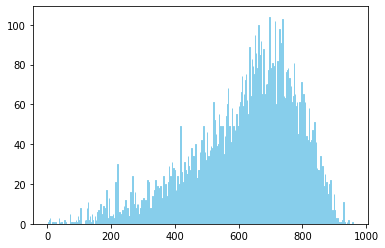

In [ ]:
# Determining size of input
# Making histogram for no of words in news shows that most news article are under 700 words.
# Lets keep each news small and truncate all news to 700 while tokenizing
plt.hist([len(x) for x in clean_text1], bins=500, color = "skyblue",ec="skyblue")
plt.show()

In [ ]:
nos = np.array([len(x) for x in clean_text1])
len(nos[nos  < 900])

12917

In [ ]:
from keras_preprocessing.sequence import pad_sequences
#Lets keep all posts to 900, add padding to posts with less than 900 words and truncating long ones
maxlen = 900

#Making all news of size maxlen defined above
X = pad_sequences(clean_text1, maxlen=maxlen)

In [ ]:
# Adding 1 because of reserved 0 index
# Embedding Layer creates one more vector for "UNKNOWN" words, or padded words (0s). This Vector is filled with zeros.
# Thus our vocab size inceeases by 1
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
# Function to create weight matrix from word2vec gensim model
def get_weight_matrix(model, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        weight_matrix[i] = model[word]
    return weight_matrix

In [ ]:
#Getting embedding vectors from word2vec and usings it as weights of non-trainable keras embedding layer
embedding_vectors = get_weight_matrix(w2v_model, word_index)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [ ]:
MAX_NB_WORDS = 50000

In [ ]:
#Defining Neural Network
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=maxlen, trainable=False))
model.add(Dropout(0.5))
#LSTM
model.add(LSTM(units=128))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='softmax'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

del embedding_vectors

In [ ]:
#Train test split
y = pd.get_dummies(df['type']).values
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(9721, 900) (9721, 16)
(3241, 900) (3241, 16)


In [ ]:
history=model.fit(X_train, y_train, validation_split=0.3, epochs=40)

Epoch 1/40
213/213 [==============================] - 12s 50ms/step - loss: 0.2446 - acc: 0.1308 - val_loss: 0.2265 - val_acc: 0.1358
Epoch 2/40
213/213 [==============================] - 10s 49ms/step - loss: 0.2240 - acc: 0.1486 - val_loss: 0.2184 - val_acc: 0.1615
Epoch 3/40
213/213 [==============================] - 10s 48ms/step - loss: 0.2165 - acc: 0.1792 - val_loss: 0.2142 - val_acc: 0.1796
Epoch 4/40
213/213 [==============================] - 10s 49ms/step - loss: 0.2094 - acc: 0.2163 - val_loss: 0.2016 - val_acc: 0.2585
Epoch 5/40
213/213 [==============================] - 10s 49ms/step - loss: 0.1962 - acc: 0.2694 - val_loss: 0.1881 - val_acc: 0.2921
Epoch 6/40
213/213 [==============================] - 10s 48ms/step - loss: 0.1832 - acc: 0.3178 - val_loss: 0.1747 - val_acc: 0.3411
Epoch 7/40
213/213 [==============================] - 10s 49ms/step - loss: 0.1716 - acc: 0.3674 - val_loss: 0.1704 - val_acc: 0.3682
Epoch 8/40
213/213 [==============================] - 11s 50ms

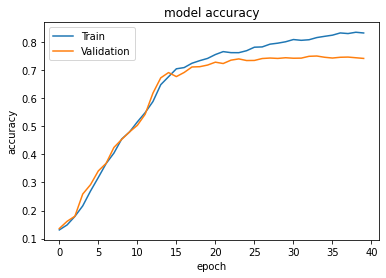

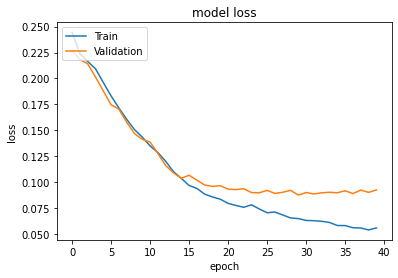

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
#Prediction is in probability of news being real, so converting into classes
# Class 0 (Fake) if predicted prob < 0.5, else class 1 (Real)
y_pred = (model.predict(X_test) >= 0.5).astype("int")

102/102 [==============================] - 2s 18ms/step


In [ ]:
accuracy_score(y_test, y_pred)

0.7371181734032706